In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
%%capture
!apt-get update
# !apt-get install -y pandoc
# !pip install langchain langchain-google-genai langchain-community faiss-cpu langchain-huggingface pypdf openai langchain_openai pypandoc Spire.Doc
# !pip install pip3-autoremove
# !pip install pinecone
# !pip install langchain_qdrant 
# !pip install langchain_pinecone
!pip-autoremove torch torchvision torchaudio -y
# !pip install unsloth
!pip install pymysql sklearn imblearn tensorflow kerastuner seaborn
!pip install torch torchvision torchaudio xformers --index-url https://download.pytorch.org/whl/cu121
# !pip install fuzzywuzzy sqlalchemy pydantic dateutil datetime
# !pip install langchain --upgrade
!pip install xgboost
!pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC,SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import kerastuner as kt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTENC,SMOTE
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,VarianceThreshold,RFE,chi2,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [4]:
quarter_df=pd.read_csv(f"/kaggle/input/quarter-dataset-1/big_df_2025-03-26_Basic Materials_without_statment_date.csv")
quarter_df

,symbol,total assets - atot,"interest inc.(exp.),net-non-op., total - snin",current ratio - scur,total current assets - atca,operating margin - sopp,cash from operating activities - otlo,capital expenditures - scex,tangible book value - stbv,capex to revenue ratio - ctrrt,...,"interest expense, net non-operating - sien",total common shares outstanding - qtco,total debt - stld,"other investing cash flow items, total - sicf",net income - ninc,normalized ebitda - sbda,operating income - sopi,"cost of revenue, total - scor",total inventory - aitl,Decision
0,2060,47707.086,-148.24700,1.74986,15669.414,5.89814,1098.39600,-452.13100,6764.530,-0.114691,...,0.0,668.9140,26041.473,520.061,-332.54400,687.95600,232.51400,3235.34500,5632.598,0
1,2060,46786.455,-154.58900,1.54512,14146.917,4.42577,983.66200,-1220.88400,6191.672,-0.293734,...,0.0,668.9140,25735.541,296.088,-107.70400,732.65500,183.95400,3335.97300,5583.315,0
2,2060,45359.496,-160.72600,1.41678,12957.323,-1.32287,2133.93300,-1636.42700,5488.487,-0.452761,...,0.0,668.9140,25786.115,277.240,-296.29200,429.93100,-47.81300,3213.15400,5107.598,0
3,2060,44975.048,-184.77400,1.30525,13018.776,-21.60384,2977.95400,-2245.16000,5022.581,-0.654072,...,0.0,668.9140,26332.538,301.424,-686.55700,359.28100,-741.57100,3148.29200,4816.171,0
4,2060,32813.967,-109.85300,0.89254,7918.528,2.48414,9.56600,-712.19100,4254.210,-0.341865,...,0.0,668.9142,14811.360,-181.685,-103.50000,-31.04700,51.75100,1934.31500,3270.067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,1322,0.000,-1.06469,0.00000,0.000,4.77889,229.88301,-295.57688,0.000,-2.682578,...,0.0,0.0000,0.000,0.000,5.17950,37.12558,5.26557,90.30012,0.000,2
921,1322,0.000,-0.67882,0.00000,0.000,3.38825,291.18490,-398.71875,0.000,-3.474711,...,0.0,0.0000,0.000,0.000,5.93892,39.84675,3.88798,93.78975,0.000,2
922,1322,0.000,-1.12642,0.00000,0.000,13.28446,58.00720,-85.90891,0.000,-0.638730,...,0.0,0.0000,0.000,0.000,15.12488,51.57566,17.86753,99.48753,0.000,1
923,1322,0.000,-1.70142,0.00000,0.000,31.77347,103.75938,-140.36985,0.000,-0.690414,...,0.0,0.0000,0.000,0.000,61.81876,100.62457,64.59949,121.51767,0.000,1


In [5]:
quarter_df.drop(["symbol"],inplace=True,axis=1)

In [ ]:
# quarter_df.info()
x.info()

In [ ]:
duplicate=quarter_df.duplicated().sum()
duplicate[duplicate>0]

In [ ]:
quarter_df.describe()

In [ ]:
quarter_df['Decision'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
fig, axes = plt.subplots(6, 7, figsize=(30, 30))
axes = axes.flatten()
x=quarter_df.drop(["Decision"],axis=1)
for i, col in enumerate(x.select_dtypes(include="number").columns):
    sns.histplot(x[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
null=transformed_df.isnull().sum()
null[null>0]

In [ ]:
fig, axes = plt.subplots(6, 7, figsize=(30, 30))
axes = axes.flatten()
# x=quarter_df.drop(["Decision"],axis=1)
for i, col in enumerate(transformed_df.select_dtypes(include="number").columns):
    sns.boxplot(transformed_df[col], ax=axes[i])
    axes[i].set_title(f'Outlier Detection of {col}')
plt.tight_layout()
plt.show()

In [6]:
def handle_outlier(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    df[col]=df[col].clip(l,u)

In [7]:
x=quarter_df.drop(["Decision"],axis=1)
# transformed_df
for col in x.select_dtypes(include="number").columns:
    #print(col)
    handle_outlier(x,col)

In [ ]:
fig, axes = plt.subplots(6, 7, figsize=(30, 30))
axes = axes.flatten()
x=quarter_df.drop(["Decision"],axis=1)
for i, col in enumerate(x.select_dtypes(include="number").columns):
    sns.histplot(x[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy import stats
pt=PowerTransformer(method="yeo-johnson")
quantile = QuantileTransformer(output_distribution='normal', random_state=0)


Processing Column: total assets - atot
Original Skewness: 1.3189
Best Transformation: Cube Root with Skewness: 0.5741


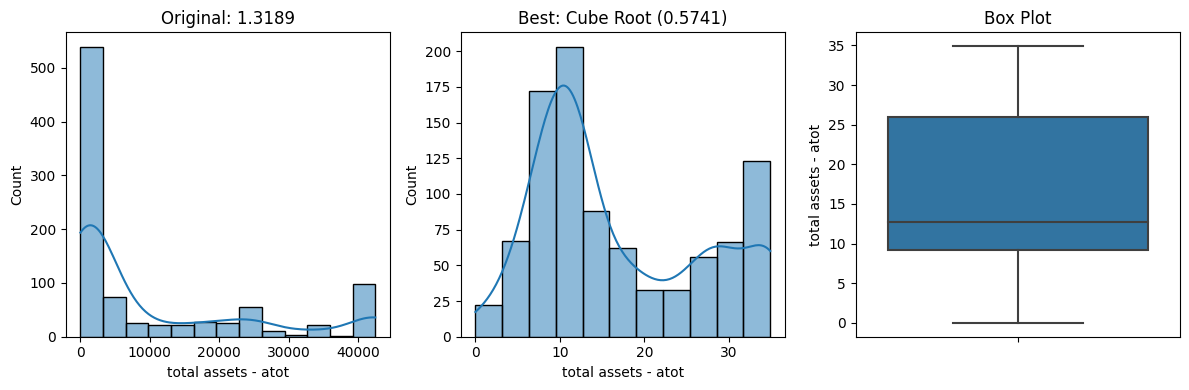


Processing Column: interest inc.(exp.),net-non-op., total - snin

Processing Column: current ratio - scur
Original Skewness: 0.8788
Best Transformation: Original with Skewness: 0.8788


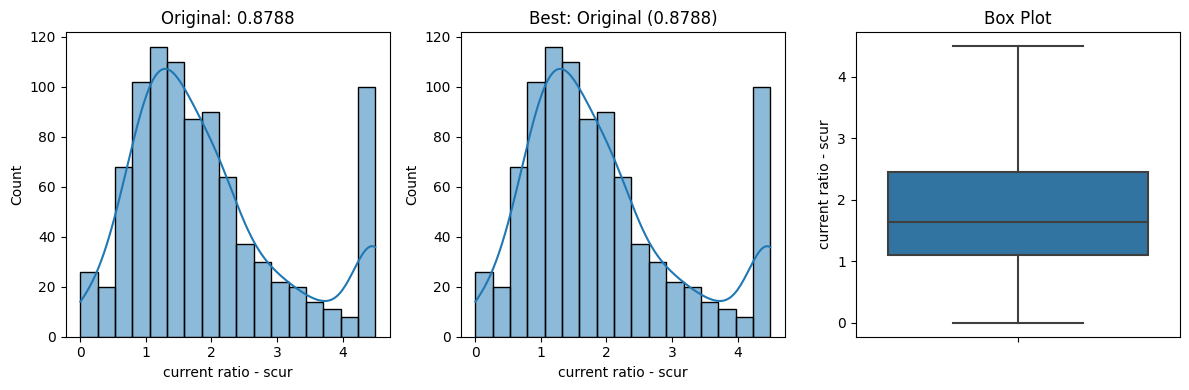


Processing Column: total current assets - atca
Original Skewness: 1.3611
Best Transformation: Cube Root with Skewness: 0.4966


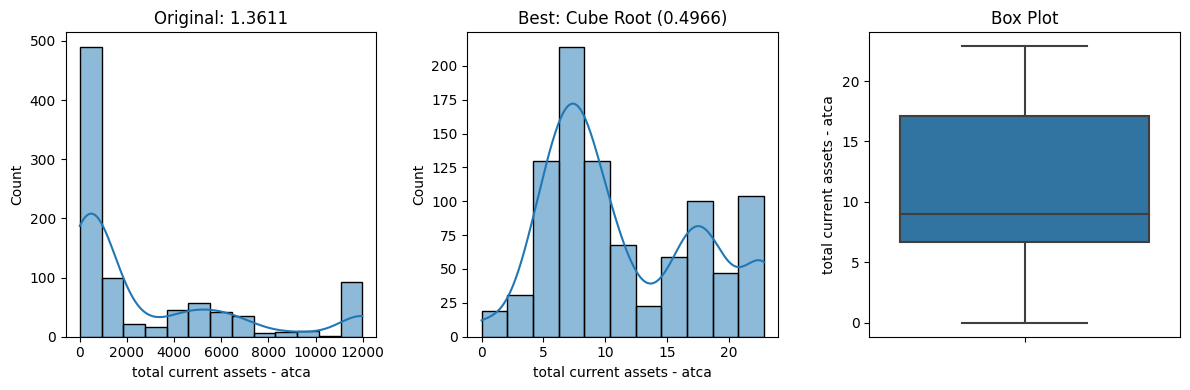


Processing Column: operating margin - sopp

Processing Column: cash from operating activities - otlo
Original Skewness: 1.2231
Best Transformation: Cube Root with Skewness: -0.1059


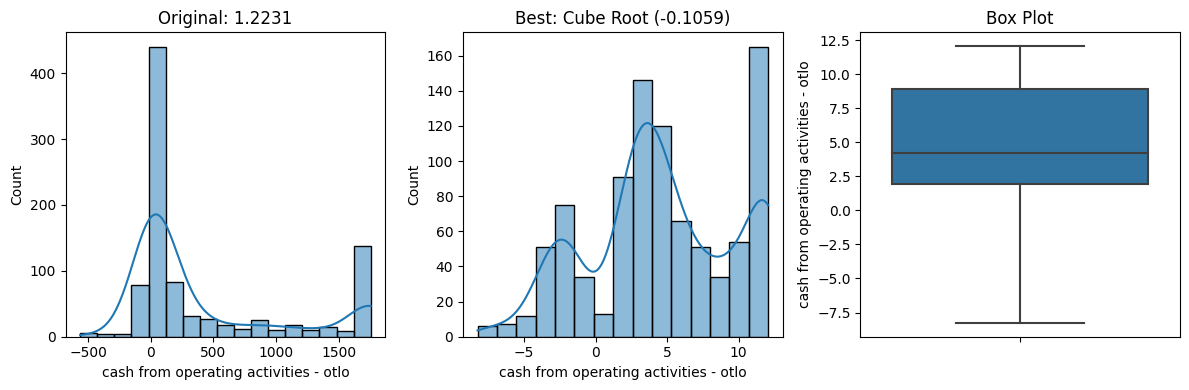


Processing Column: capital expenditures - scex
Original Skewness: -1.1883
Best Transformation: Cube Root with Skewness: -0.4905


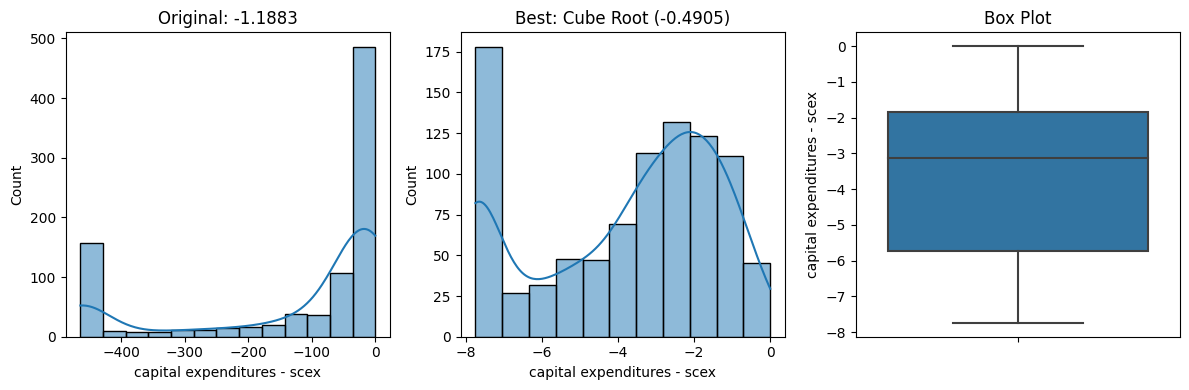


Processing Column: tangible book value - stbv
Original Skewness: 1.1823
Best Transformation: Cube Root with Skewness: 0.5716


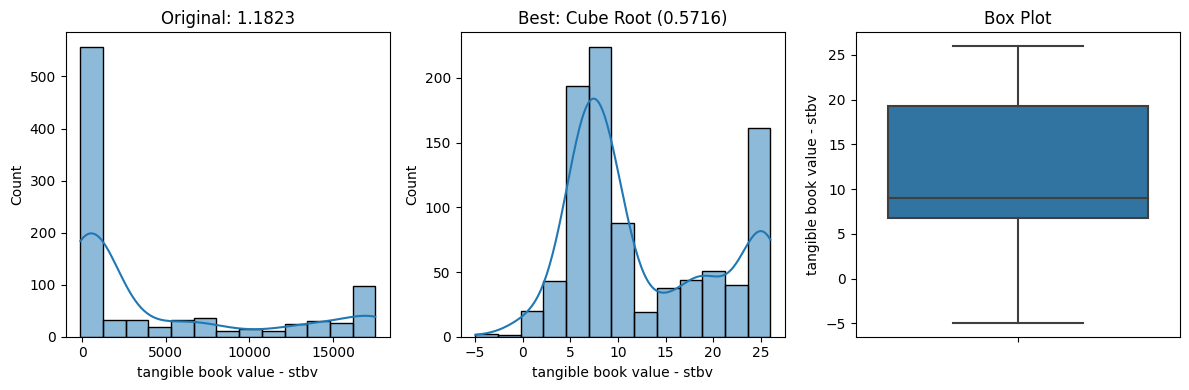


Processing Column: capex to revenue ratio - ctrrt
Original Skewness: -1.2600
Best Transformation: Cube Root with Skewness: -0.0841


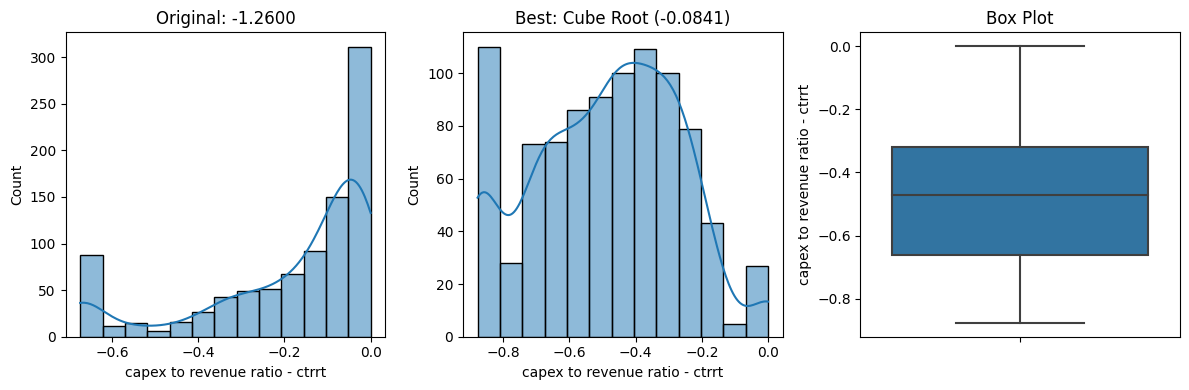


Processing Column: effective tax rate - setr
Original Skewness: 1.0830
Best Transformation: Cube Root with Skewness: 0.3778


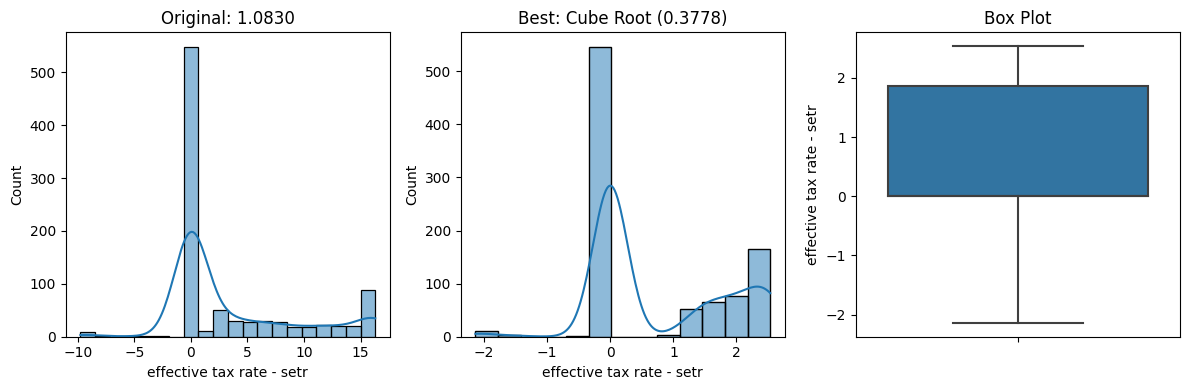


Processing Column: net profit margin - snpm

Processing Column: net sales - rnts
Original Skewness: 1.1565
Best Transformation: Cube Root with Skewness: 0.2697


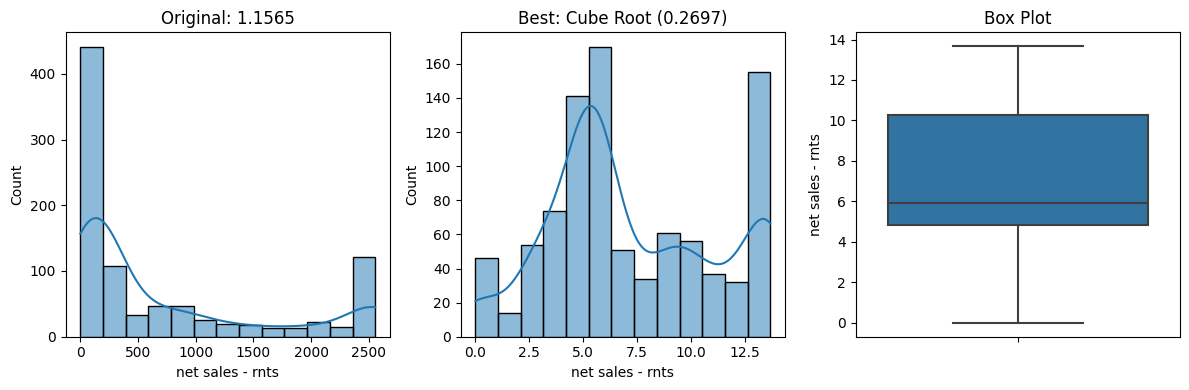


Processing Column: total revenue - rtlr
Original Skewness: 1.2105
Best Transformation: Cube Root with Skewness: 0.3587


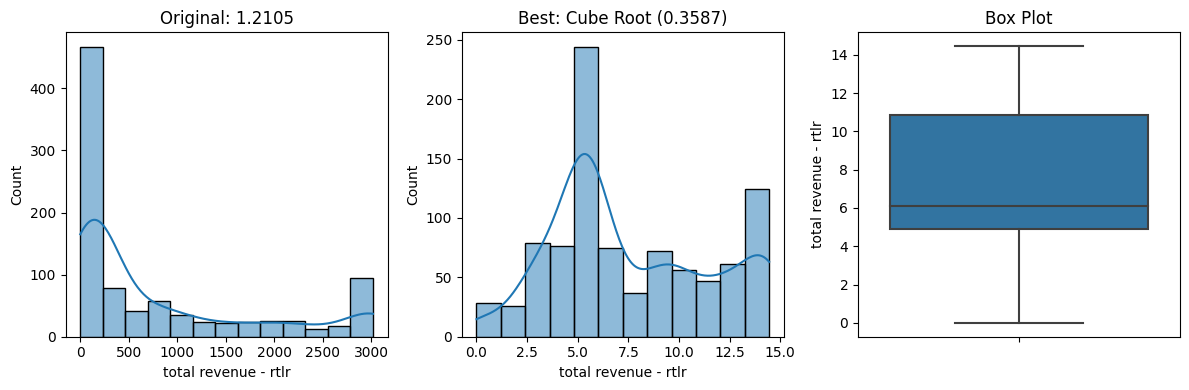


Processing Column: accounts payable - lapb
Original Skewness: 1.1962
Best Transformation: Quantile with Skewness: 0.3973


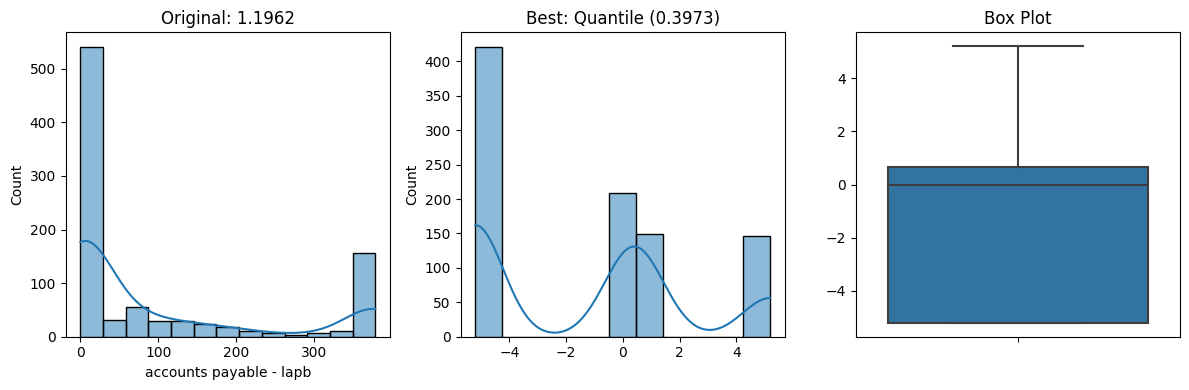


Processing Column: gross profit - sgrp
Original Skewness: 1.0855
Best Transformation: Cube Root with Skewness: -0.4016


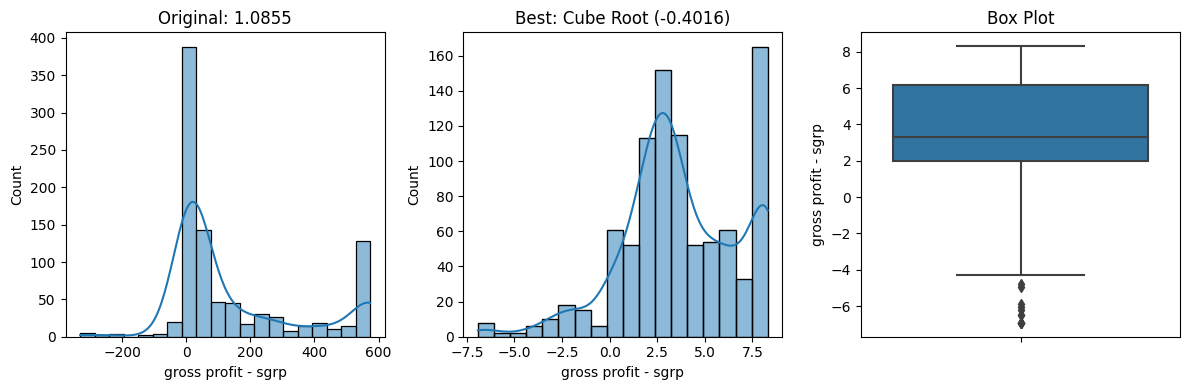


Processing Column: total current assets less inventory - scui
Original Skewness: 1.3120
Best Transformation: Cube Root with Skewness: 0.5245


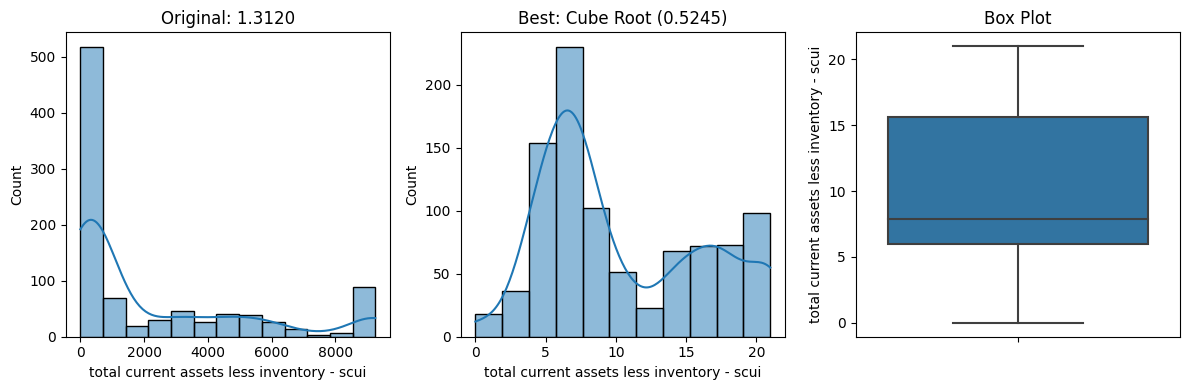


Processing Column: total current liabilities - ltcl
Original Skewness: 1.2384
Best Transformation: Cube Root with Skewness: 0.2652


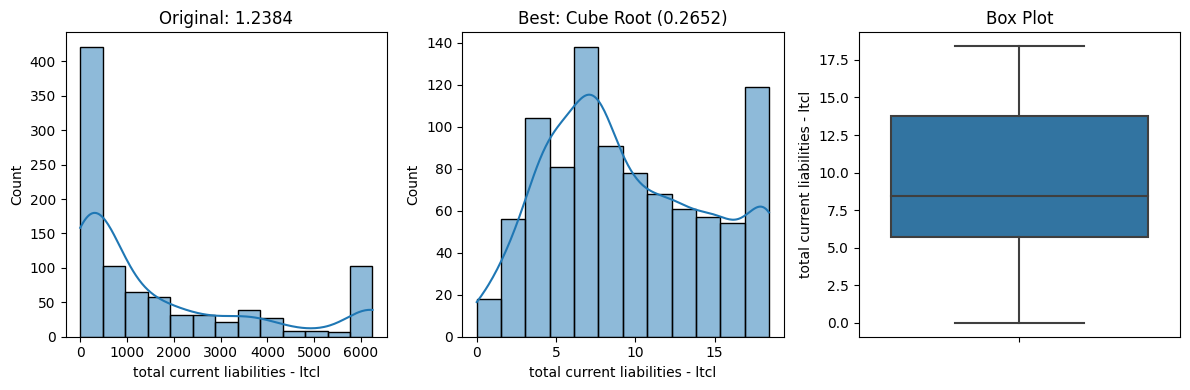


Processing Column: retained earnings (accumulated deficit) - qred
Original Skewness: 0.9022
Best Transformation: Cube Root with Skewness: -0.3663


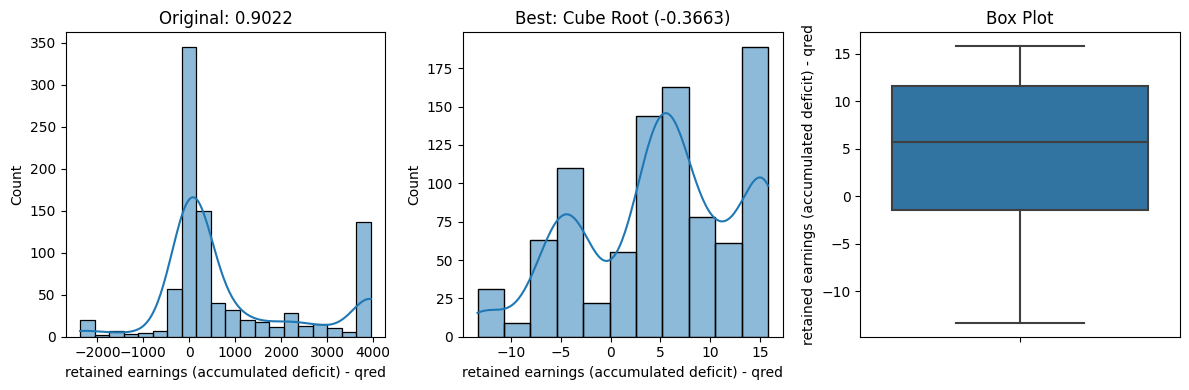


Processing Column: total equity - qtle
Original Skewness: 1.1978
Best Transformation: Cube Root with Skewness: 0.5907


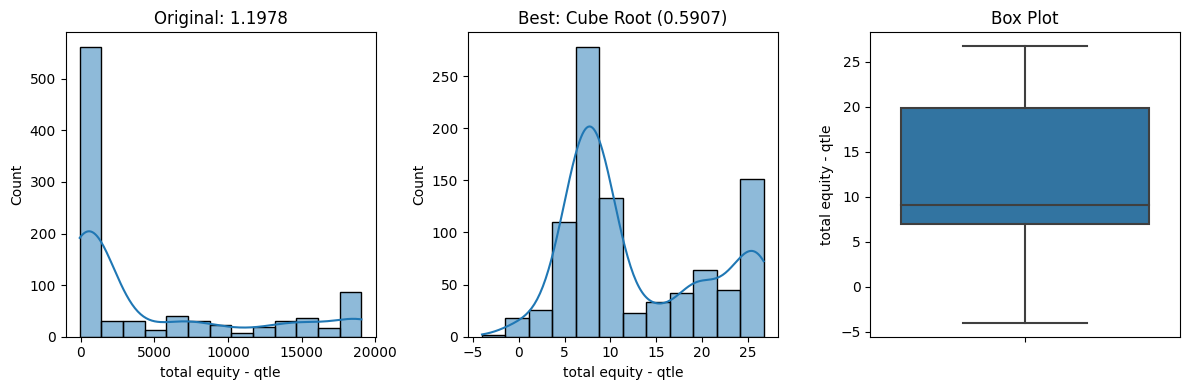


Processing Column: debt to equity ratio - dtert
Original Skewness: 1.0672
Best Transformation: Cube Root with Skewness: -0.5376


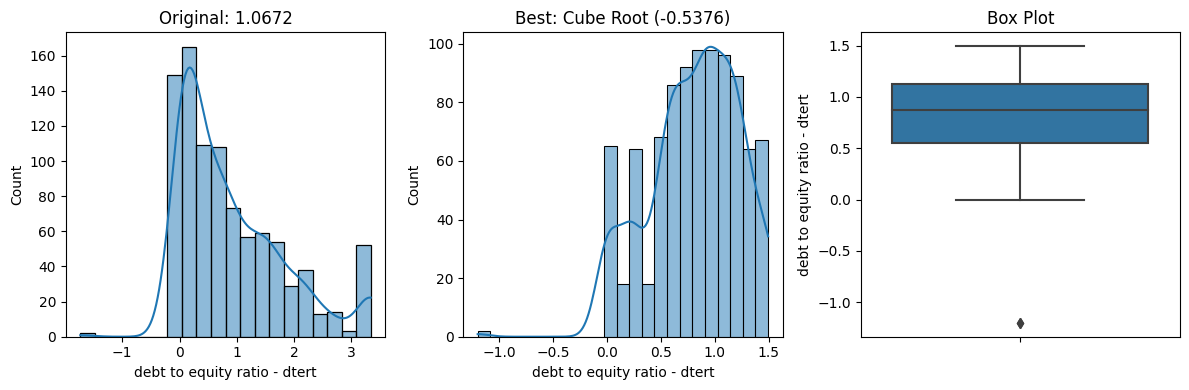


Processing Column: cash & equivalents - acae
Original Skewness: 1.1984
Best Transformation: Quantile with Skewness: 0.0314


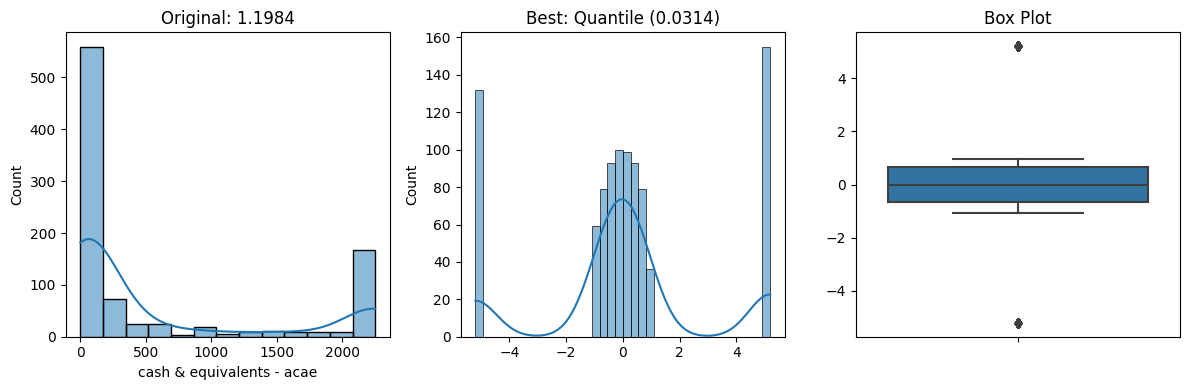


Processing Column: basic eps including extraordinary items - sbai

Processing Column: total cash dividends paid - fcdp

Processing Column: normalized ebit - sbit
Original Skewness: 0.8977
Best Transformation: Cube Root with Skewness: -0.1929


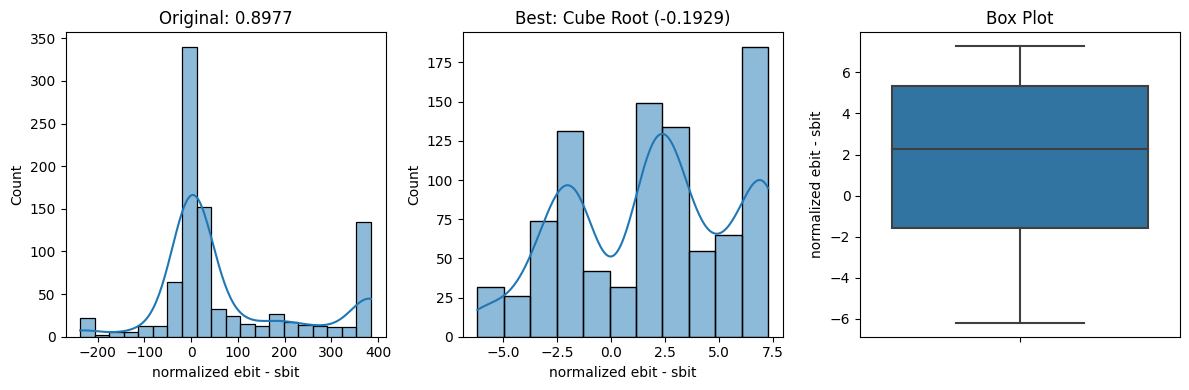


Processing Column: net income before taxes - eibt
Original Skewness: 0.7540
Best Transformation: Cube Root with Skewness: -0.2220


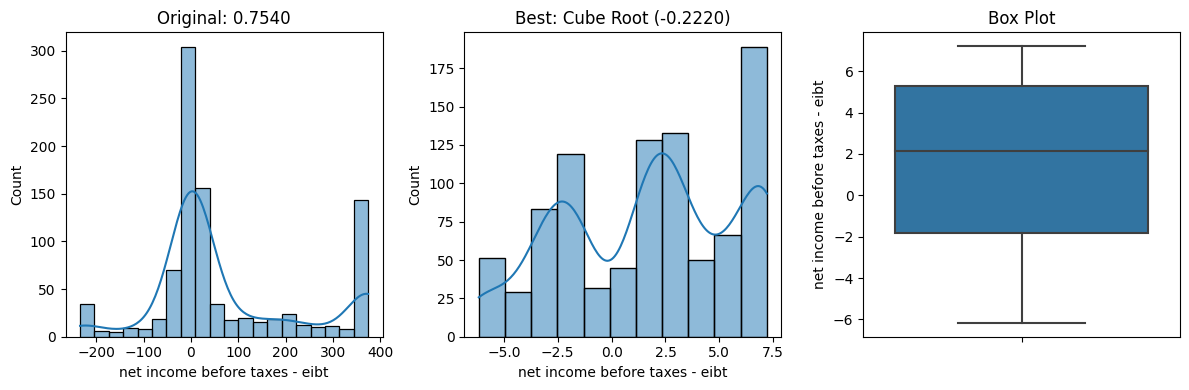


Processing Column: interest coverage ratio - icrt

Processing Column: tangible book value per share - stbp
Original Skewness: 0.5917
Best Transformation: Original with Skewness: 0.5917


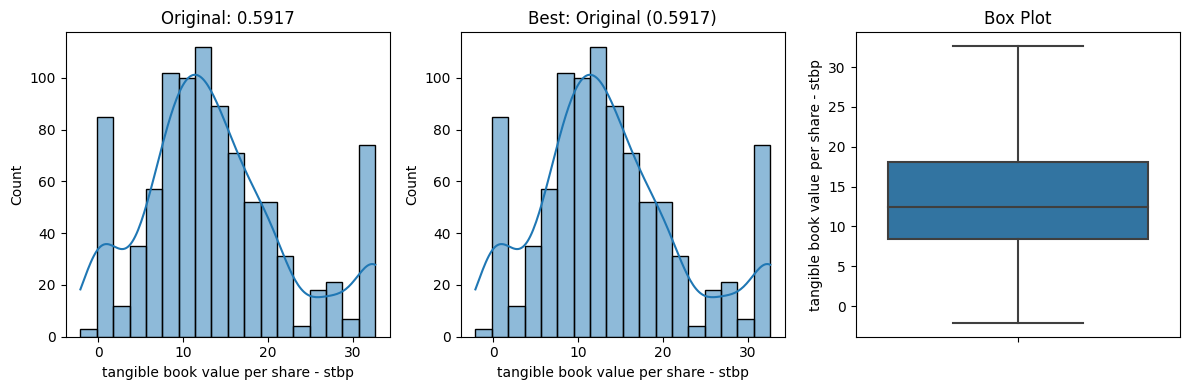


Processing Column: total long term debt - lttd
Original Skewness: 1.0783
Best Transformation: Quantile with Skewness: 0.1810


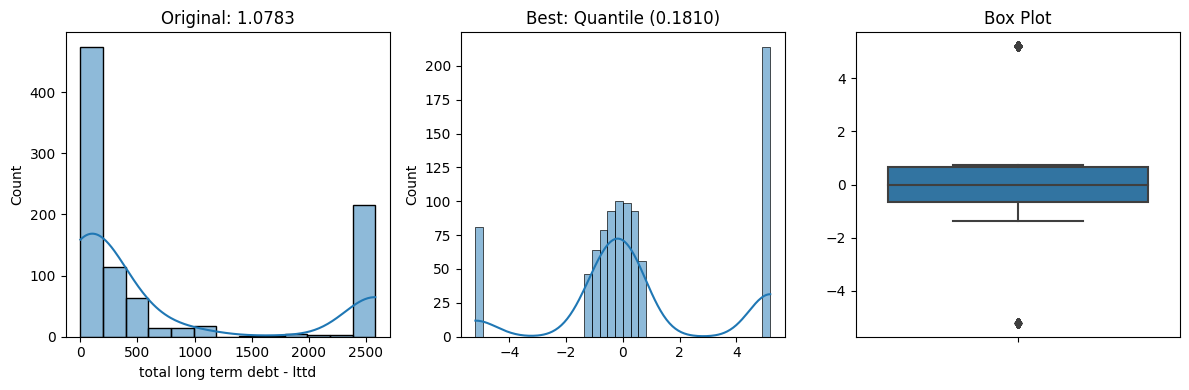


Processing Column: free cash flow ratio - fcfrt
Original Skewness: 1.2085
Best Transformation: Cube Root with Skewness: -0.0301


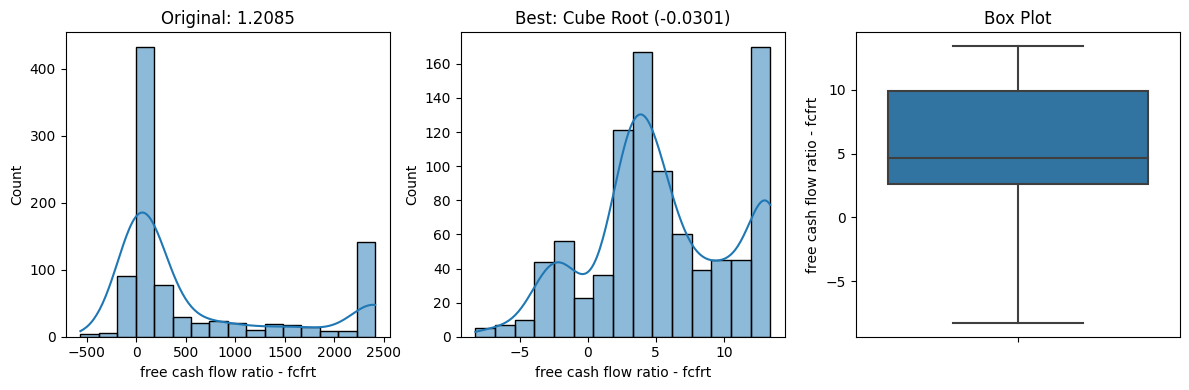


Processing Column: other operating cash flow - oocf
Original Skewness: -0.8255
Best Transformation: Original with Skewness: -0.8255


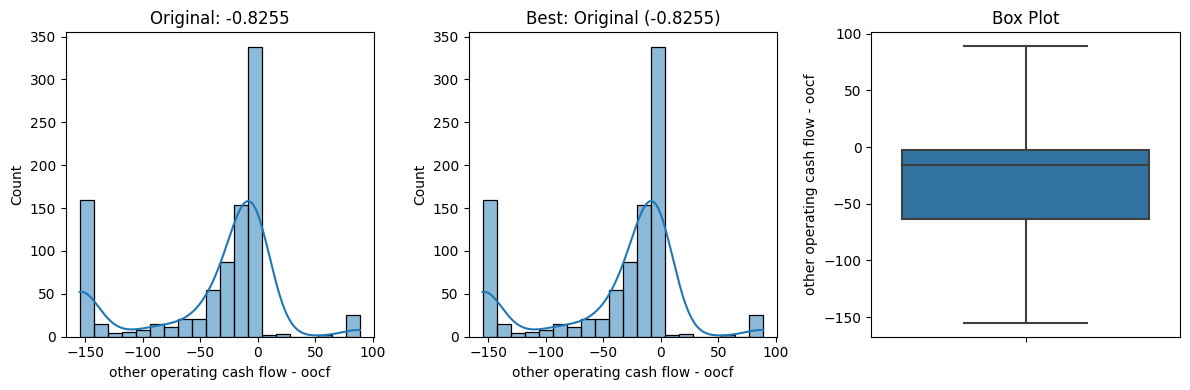


Processing Column: diluted eps excluding extraord items - sdbf

Processing Column: quick ratio - sqck
Original Skewness: 0.9769
Best Transformation: Cube Root with Skewness: -0.7179


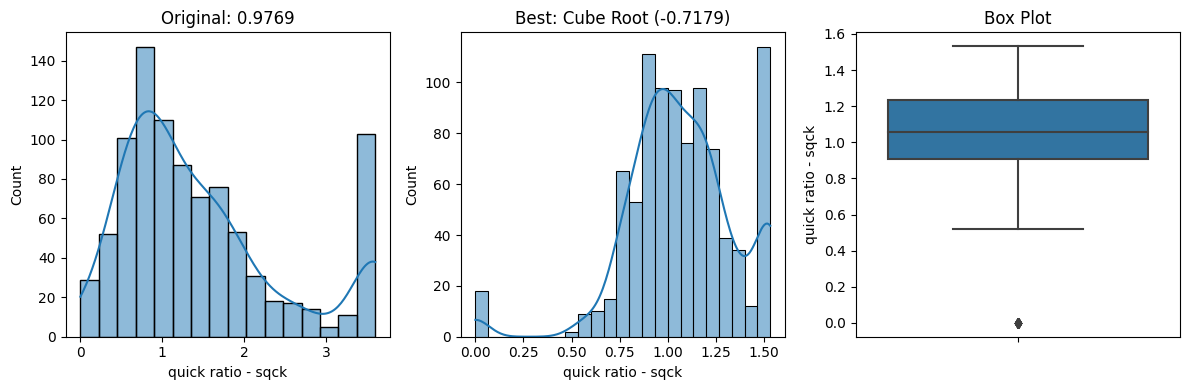


Processing Column: accounts receivable - oacr

Processing Column: interest expense, net non-operating - sien

Processing Column: total common shares outstanding - qtco
Original Skewness: 1.2494
Best Transformation: Cube Root with Skewness: 0.5788


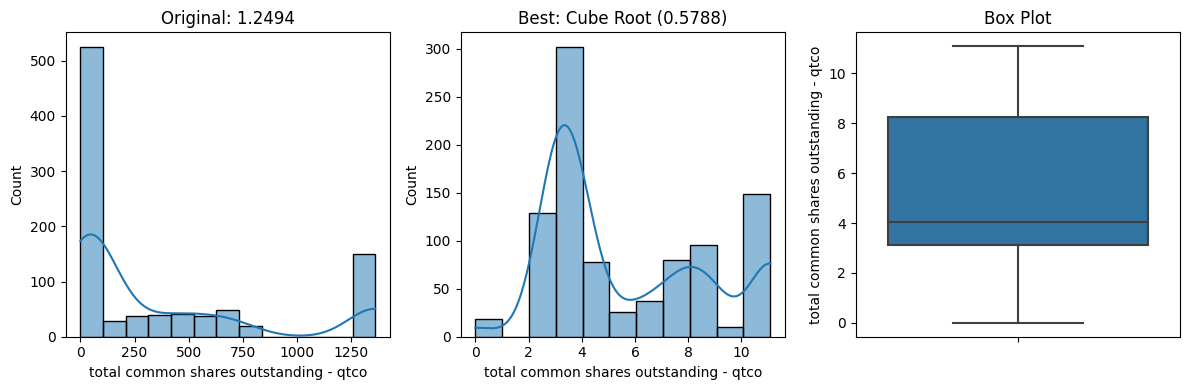


Processing Column: total debt - stld
Original Skewness: 1.1172
Best Transformation: Quantile with Skewness: 0.2443


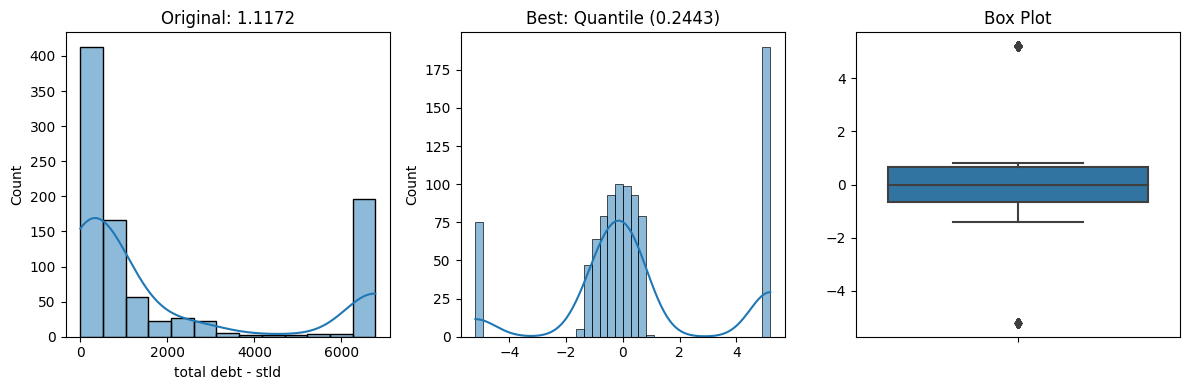


Processing Column: other investing cash flow items, total - sicf

Processing Column: net income - ninc
Original Skewness: 0.6396
Best Transformation: Cube Root with Skewness: -0.1989


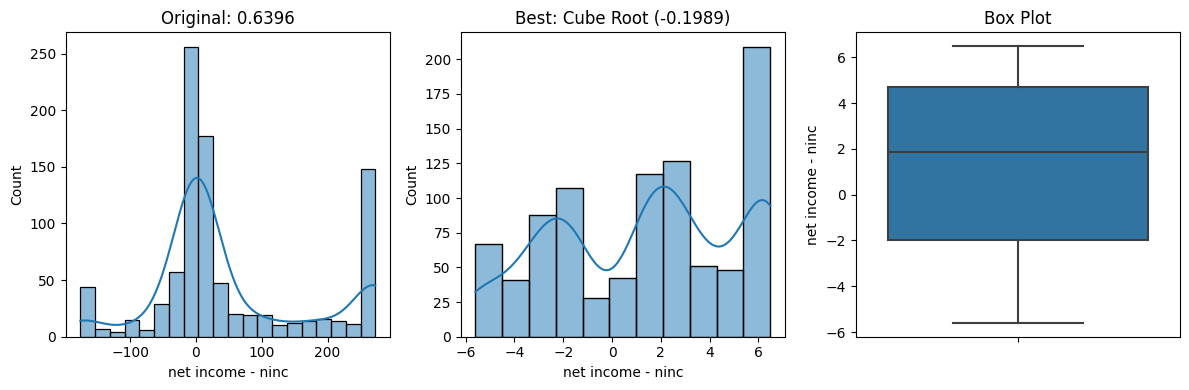


Processing Column: normalized ebitda - sbda
Original Skewness: 1.2241
Best Transformation: Cube Root with Skewness: -0.0894


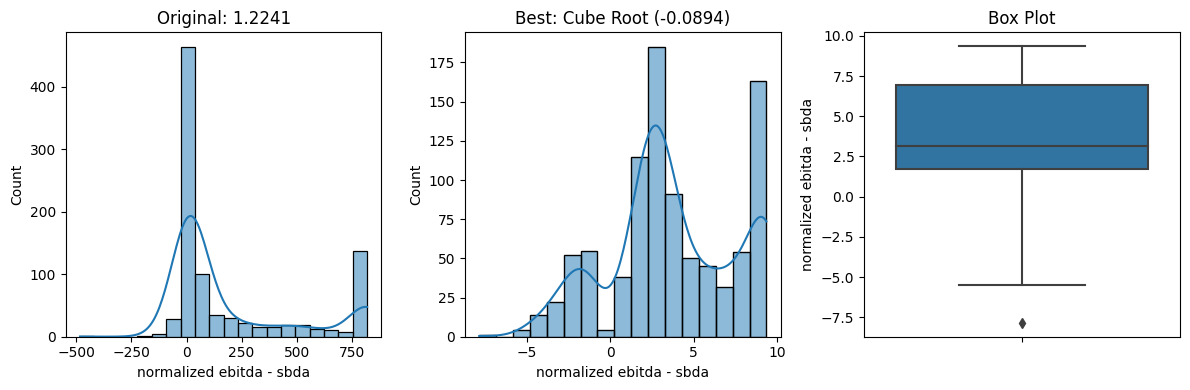


Processing Column: operating income - sopi
Original Skewness: 0.9215
Best Transformation: Cube Root with Skewness: -0.2348


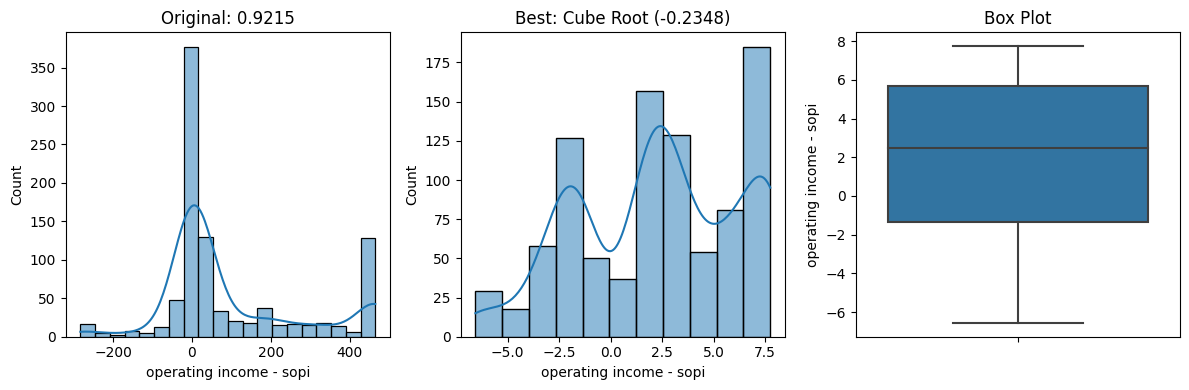


Processing Column: cost of revenue, total - scor
Original Skewness: 1.2117
Best Transformation: Cube Root with Skewness: 0.2565


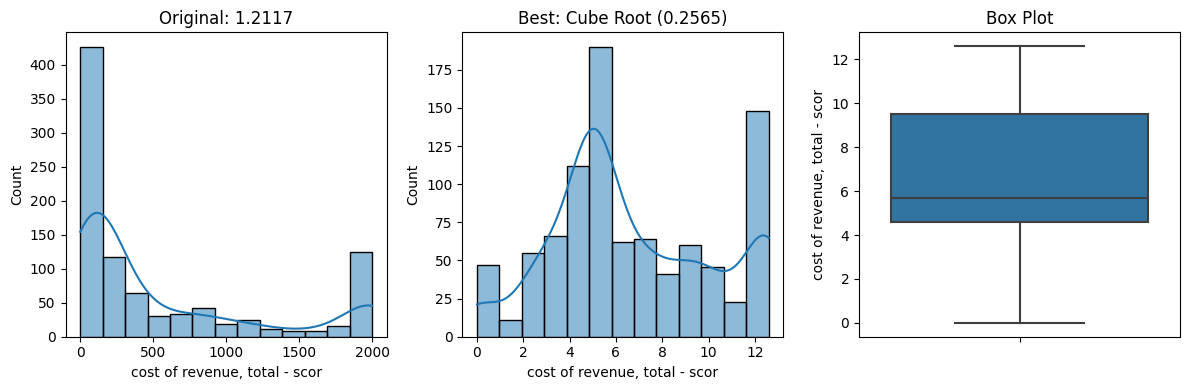


Processing Column: total inventory - aitl
Original Skewness: 1.1688
Best Transformation: Quantile with Skewness: 0.0321


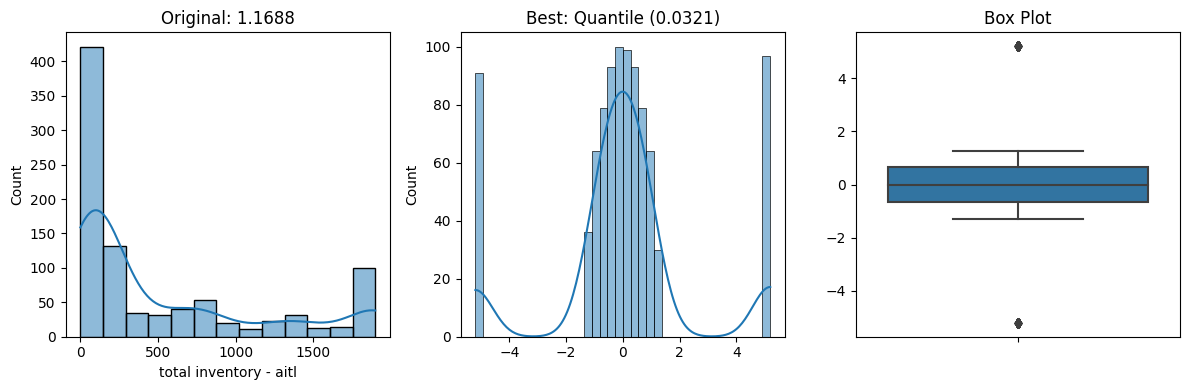

In [9]:
def best_transformation(df):
    transformed_data = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        print(f"\nProcessing Column: {col}")
        
        # Original Skewness
        original_skew = df[col].skew()
        if -0.5>original_skew or original_skew>0.5:
            # Define transformations
            transformations = {
                "Original": df[col],
                # "Log": np.log(df[col] + 0.0001),
                "Square": df[col]**2,
                # "Square Root": np.sqrt(df[col]),
                "Cube": df[col]**3,
                "Cube Root": np.cbrt(df[col]),
                # "Reciprocal": 1 / (df[col] + 1),
                # "Yeo-Johnson": PowerTransformer(method="yeo-johnson").fit_transform(df[[col]]).flatten(),
                "Quantile": QuantileTransformer(output_distribution="normal").fit_transform(df[[col]]).flatten()
            }
            
            # Compute skewness for each transformation
            skew_results = {name: pd.Series(data).skew() for name, data in transformations.items()}
            
            # Find the best transformation (closest to 0 skewness)
            best_transformation = min(skew_results, key=lambda k: abs(skew_results[k]))
            best_skew = skew_results[best_transformation]
            
            print(f"Original Skewness: {original_skew:.4f}")
            print(f"Best Transformation: {best_transformation} with Skewness: {best_skew:.4f}")
    
            # Store results
            transformed_data[col] = transformations[best_transformation]
    
            # Plot Distributions
            fig, axes = plt.subplots(1, 3, figsize=(12, 4))
            sns.histplot(df[col], kde=True, ax=axes[0]).set_title(f"Original: {original_skew:.4f}")
            sns.histplot(transformed_data[col], kde=True, ax=axes[1]).set_title(f"Best: {best_transformation} ({best_skew:.4f})")
            sns.boxplot(y=transformed_data[col], ax=axes[2]).set_title("Box Plot")
            plt.tight_layout()
            plt.show()
        else:
            transformed_data[col]=original_skew

    return pd.DataFrame(transformed_data)

# Example Usage
sample_x=x
transformed_df = best_transformation(sample_x)


In [10]:
x=transformed_df

In [11]:
y=quarter_df['Decision']

In [12]:
def selector(func,X,y):
    selector = SelectKBest(score_func=func, k=35)
    X_resampled_selected = selector.fit_transform(X, y)
    selected_features_mask = selector.get_support()
    
    # Get the names of the selected features
    selected_feature_names = X.columns[selected_features_mask]
    
    # Convert the selected features to a DataFrame
    X_resampled_selected_df = pd.DataFrame(X_resampled_selected, columns=selected_feature_names)
    
    return X_resampled_selected_df

In [13]:
X_kbest_f_classif=selector(f_classif,x,y)
# X_kbest_f_classif

In [14]:
X_kbest_mic=selector(mutual_info_classif,x,y)
# X_kbest_mic

In [16]:
def variance_threshhold(x):
    selector_vt = VarianceThreshold(threshold=0.6)  # Example threshold
    X_kbest_vt = selector_vt.fit_transform(x)
    selected_features_mask_vt = selector_vt.get_support()
    selected_features_vt = x.columns[selected_features_mask_vt]
    X_vt_df_1 = pd.DataFrame(x[selected_features_vt])
    return X_vt_df_1
X_vt_df_1=variance_threshhold(x)

In [17]:
def rfe(x,y,n):
    model = RandomForestClassifier(random_state=42)
    selector = RFE(model, n_features_to_select=n)
    selector.fit_transform(x, y)
    selected_features_mask = selector.support_
    selected_features = x.columns[selected_features_mask]
    X_rfe_df_1 = pd.DataFrame(x[selected_features])
    return X_rfe_df_1
X_rfe_df_1=rfe(x,y,35)

In [18]:
X_train_f_classif,X_test_f_classif,y_train_f_classif,y_test_f_classif=train_test_split(X_kbest_f_classif,y,random_state=42,test_size=0.2)

In [19]:
X_train_mic,X_test_mic,y_train_mic,y_test_mic=train_test_split(X_kbest_mic,y,random_state=42,test_size=0.2)

In [20]:
X_train_vt,X_test_vt,y_train_vt,y_test_vt=train_test_split(X_vt_df_1,y,random_state=42,test_size=0.2)

In [21]:
X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe=train_test_split(X_rfe_df_1,y,random_state=42,test_size=0.2)

In [22]:
from sklearn.preprocessing import RobustScaler
# minmax=MinMaxScaler()
robust=RobustScaler()

In [23]:
X_train_f_classif_scale=robust.fit_transform(X_train_f_classif)
X_test_f_classif_scale=robust.transform(X_test_f_classif)

In [24]:
X_train_mic_scale=robust.fit_transform(X_train_mic)
X_test_mic_scale=robust.transform(X_test_mic)

In [25]:
X_train_vt_scale=robust.fit_transform(X_train_vt)
X_test_vt_scale=robust.transform(X_test_vt)

In [26]:
X_train_rfe_scale=robust.fit_transform(X_train_rfe)
X_test_rfe_scale=robust.transform(X_test_rfe)

In [27]:
from imblearn.ensemble import BalancedRandomForestClassifier,EasyEnsembleClassifier
rfc=EasyEnsembleClassifier() #BalancedRandomForestClassifier() #RandomForestClassifier()

In [28]:
rfc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_rfc_1=rfc.predict(X_test_f_classif_scale)

In [29]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_rfc_1))
# print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_rfc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_f_classif,y_test_pred_rfc_1,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_rfc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_rfc_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_rfc_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_rfc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_rfc_1))

Mean squared error:  1.4378378378378378
Beta F1 score:  0.3081081081081081
Accuracy for test set:  0.3081081081081081
Precision for test set:  0.3081081081081081
Recall for test set:  0.3081081081081081
F1 score for test set:  0.3081081081081081
Confusion matrix:  [[21 21 32]
 [22 19 20]
 [14 19 17]]


In [52]:
# param_grid = {
#     'n_estimators': np.arange(10,100,10), 'max_depth': np.arange(10,100,10),
#     'min_samples_split': np.arange(2,5), 'min_samples_leaf': np.arange(1,5),#'max_features': ['auto', 'sqrt', 'log2'],
#     'max_leaf_nodes': np.arange(10,40,10), #'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
#     #'criterion': ['gini', 'log_loss', 'entropy']
# }# 'splitter': ['best'],
param_grid = {
    'n_estimators': np.arange(50, 401, 50),       # Number of trees
    'max_depth': np.arange(50, 200, 50),          # Maximum depth of trees
    # 'min_samples_split': np.arange(2, 10, 2),     # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 10, 3),          # Minimum samples required at each leaf node
    # 'max_features': ['sqrt', 'log2'],     # Number of features to consider for split
    # 'bootstrap': [True, False],                   # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy'],              # Function to measure the quality of a split
    'min_weight_fraction_leaf': np.arange(0.0, 0.5),
    'min_impurity_decrease': np.arange(0.0, 0.5),
    # 'oob_score': [True, False],
    'sampling_strategy': ['majority', 'not minority', 'not majority', 'all', 'auto'],
    # 'replacement': [True, False],
}

In [41]:
import numpy as np
param_grid = {
    # Ensemble-level parameters
    'n_estimators': np.arange(50, 200, 50),  # Number of AdaBoost learners in the ensemble
    'sampling_strategy': ['auto', 'majority', 'not minority', 'not majority', 'all'],
    'replacement': [True, False],
    'warm_start': [True, False],
    # 'random_state': [42],  # Ensures reproducibility

    # Base estimator (AdaBoostClassifier) parameters
#     'estimator__n_estimators': [10, 50, 100],
#     'estimator__learning_rate': np.arange(0.01,0.1,0.01),
#     'estimator__base_estimator__max_depth': np.arange(1, 10, 3),
#     'estimator__base_estimator__min_samples_leaf': np.arange(1, 10, 3),
#     'estimator__base_estimator__criterion': ['gini', 'entropy'],
}


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,300,100), 'max_depth': np.arange(4,10,2),'min_samples_split': np.arange(2,10,2), 
    'min_samples_leaf': np.arange(4,10,2), 'max_leaf_nodes': np.arange(10,40,10), 
}

In [37]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of AdaBoost learners in the ensemble
    'estimator__n_estimators': [50, 100],  # Number of estimators in AdaBoost
    'estimator__learning_rate': [0.01, 0.1, 1.0],  # Learning rate for AdaBoost
    'estimator__base_estimator__max_depth': [1, 2, 3],  # Max depth for DecisionTree
    'estimator__base_estimator__min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'estimator__base_estimator__criterion': ['gini', 'entropy'],  # Splitting criterion
    'sampling_strategy': ['auto', 'majority', 'not minority', 'not majority', 'all'],  # Sampling strategies
    'replacement': [True, False],  # Sampling with or without replacement
    'warm_start': [True, False],  # Reuse previous solution
    'random_state': [42],  # Random state for reproducibility
}


In [42]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid_search_1 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='f1',verbose=True)
random_search_1=RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=3, scoring='f1')

In [43]:
grid_search_1.fit(X_train_f_classif_scale, y_train_f_classif)
best_rfc_1_1 = grid_search_1.best_estimator_
# Predict on the test set
y_test_pred_rfc_1_rcv = best_rfc_1_1.predict(X_test_f_classif_scale)
# y_test_pred_rfc_1_rcv

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [54]:
grid_search_1.fit(X_train_f_classif_scale, y_train_f_classif)
best_rfc_1_1_g = grid_search_1.best_estimator_
# Predict on the test set
y_test_pred_rfc_1_gcv = best_rfc_1_1_g.predict(X_test_f_classif_scale)
# y_test_pred_rfc_1_rcv

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


In [ ]:
print("Best Parameters: ", grid_search_1.best_params_)
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_rfc_1_gcv,average='micro'))

In [56]:
rfc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_rfc_2=rfc.predict(X_test_mic_scale)

In [57]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2))
print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_mic,y_test_pred_rfc_2,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_rfc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_rfc_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_rfc_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_rfc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_rfc_2))

Mean squared error:  1.4756756756756757
Root mean squared error:  1.2147739195733813
Beta F1 score:  0.33513513513513515
Accuracy for test set:  0.33513513513513515
Precision for test set:  0.33513513513513515
Recall for test set:  0.33513513513513515
F1 score for test set:  0.33513513513513515
Confusion matrix:  [[19 23 32]
 [22 25 14]
 [18 14 18]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [58]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_1 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='f1',verbose=True)
random_search_1 = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='f1')

In [75]:
random_search_3.fit(X_train_mic_scale, y_train_mic)
# grid_search_1.fit(X_train_mic_scale, y_train_mic)
best_rfc_1_2 = random_search_3.best_estimator_
# Predict on the test set
y_test_pred_rfc_2_rcv = best_rfc_1_2.predict(X_test_mic_scale)
# y_test_pred_rfc_2_rcv

In [76]:
print("Best Parameters: ", random_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_rfc_2_rcv,average='micro'))

Best Parameters:  {'sampling_strategy': 'majority', 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_depth': 50, 'criterion': 'gini'}
F1 score for test set:  0.35135135135135137


In [61]:
rfc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_rfc_3=rfc.predict(X_test_vt_scale)

In [62]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_rfc_3))
print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_rfc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_vt,y_test_pred_rfc_3,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_rfc_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_rfc_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_rfc_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_rfc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_rfc_3))

Mean squared error:  1.508108108108108
Root mean squared error:  1.2280505315776333
Beta F1 score:  0.33513513513513515
Accuracy for test set:  0.33513513513513515
Precision for test set:  0.33513513513513515
Recall for test set:  0.33513513513513515
F1 score for test set:  0.33513513513513515
Confusion matrix:  [[18 20 36]
 [22 26 13]
 [16 16 18]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [72]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=3, scoring='f1')

In [73]:
random_search_3.fit(X_train_vt_scale, y_train_vt)
# grid_search_1.fit(X_train_vt_scale, y_train_vt)
best_rfc_1_3 = random_search_3.best_estimator_
# Predict on the test set
y_test_pred_rfc_3_rcv = best_rfc_1_3.predict(X_test_vt_scale)
# y_test_pred_rfc_3_rcv

In [74]:
print("Best Parameters: ", random_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_rfc_3_rcv,average='micro'))

Best Parameters:  {'sampling_strategy': 'all', 'n_estimators': 50, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_depth': 150, 'criterion': 'gini'}
F1 score for test set:  0.34594594594594597


In [65]:
rfc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_rfc_4=rfc.predict(X_test_rfe_scale)

In [66]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4))
print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_rfe,y_test_pred_rfc_4,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_rfc_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_rfc_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_rfc_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_rfc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_rfc_4))

Mean squared error:  1.4054054054054055
Root mean squared error:  1.1854979567276382
Beta F1 score:  0.372972972972973
Accuracy for test set:  0.372972972972973
Precision for test set:  0.372972972972973
Recall for test set:  0.372972972972973
F1 score for test set:  0.37297297297297294
Confusion matrix:  [[19 19 36]
 [19 26 16]
 [12 14 24]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [69]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv=5, scoring='f1')

In [70]:
random_search_3.fit(X_train_rfe_scale, y_train_rfe)
# grid_search_1.fit(X_train_rfe_scale, y_train_rfe)
best_rfc_1_4 = random_search_3.best_estimator_
# Predict on the test set
y_test_pred_rfc_4_rcv = best_rfc_1_4.predict(X_test_rfe_scale)
# y_test_pred_rfc_4_rcv

In [71]:
print("Best Parameters: ", random_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_rfc_4_rcv,average='micro'))

Best Parameters:  {'sampling_strategy': 'auto', 'n_estimators': 300, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_depth': 100, 'criterion': 'entropy'}
F1 score for test set:  0.34594594594594597


In [ ]:
grid_search_1.fit(X_train_rfe_scale, y_train_rfe)
best_rfc_1_1_g = grid_search_1.best_estimator_
# Predict on the test set
y_test_pred_rfc_1_gcv = best_rfc_1_1_g.predict(X_test_rfe_scale)
# y_test_pred_rfc_1_rcv

In [26]:
dtc=DecisionTreeClassifier()

In [58]:
dtc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_dtc_1=dtc.predict(X_test_f_classif_scale)

In [59]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_dtc_1))
# print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_dtc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_f_classif,y_test_pred_dtc_1,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_dtc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_dtc_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_dtc_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_dtc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_dtc_1))

Mean squared error:  1.5135135135135136
Beta F1 score:  0.3297297297297297
Accuracy for test set:  0.32972972972972975
Precision for test set:  0.32972972972972975
Recall for test set:  0.32972972972972975
F1 score for test set:  0.32972972972972975
Confusion matrix:  [[23 21 30]
 [20 21 20]
 [22 11 17]]


In [30]:
param_grid = {
    'criterion': ['gini', 'log_loss', 'entropy'], 'max_depth': np.arange(50,400,50),
    'min_samples_split': np.arange(2,10,2), 'min_samples_leaf': np.arange(1,10,2),'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],#'min_impurity_decrease': np.arange(0,0.1,0.01)
} #'splitter': ['best', 'random'],

In [31]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_2 = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=3, scoring='f1')
grid_search_2 = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=3, scoring='f1',verbose=True)

In [63]:
grid_search_1.fit(X_train_f_classif_scale, y_train_f_classif)
best_rfc_2_1 = grid_search_1.best_estimator_
# Predict on the test set
y_test_pred_dtc_1_rcv = best_rfc_2_1.predict(X_test_f_classif_scale)
# y_test_pred_dtc_1_rcv

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


In [40]:
grid_search_2.fit(X_train_f_classif_scale, y_train_f_classif)
best_rfc_2_1 = grid_search_2.best_estimator_
# Predict on the test set
y_test_pred_dtc_1_rcv = best_rfc_2_1.predict(X_test_f_classif_scale)
# y_test_pred_dtc_1_rcv

Fitting 3 folds for each of 3360 candidates, totalling 10080 fits


In [41]:
print("Best Parameters: ", grid_search_2.best_params_)
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_dtc_1_rcv,average='micro'))

Best Parameters:  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 score for test set:  0.35135135135135137


In [65]:
dtc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_dtc_2=dtc.predict(X_test_mic_scale)

In [66]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_dtc_2))
# print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_mic,y_test_pred_dtc_2,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_dtc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_dtc_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_dtc_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_dtc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_dtc_2))

Mean squared error:  1.1783783783783783
Beta F1 score:  0.42162162162162165
Accuracy for test set:  0.42162162162162165
Precision for test set:  0.42162162162162165
Recall for test set:  0.42162162162162165
F1 score for test set:  0.42162162162162165
Confusion matrix:  [[25 28 21]
 [23 27 11]
 [16  8 26]]


In [ ]:
param_grid = {
    'max_depth': np.arange(10,100,10),'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),
    'max_leaf_nodes': [10, 20, 30], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'],
}# 'splitter': ['best'],'n_estimators': np.arange(100,1000,10),'bootstrap': [True, False],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_2 = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=3, scoring='f1')

In [38]:
grid_search_2.fit(X_train_mic_scale, y_train_mic)
best_dtc_2_2 = grid_search_2.best_estimator_
# Predict on the test set
y_test_pred_dtc_2_rcv = best_dtc_2_2.predict(X_test_mic_scale)
# y_test_pred_dtc_2_rcv

Fitting 3 folds for each of 3360 candidates, totalling 10080 fits


In [68]:
grid_search_1.fit(X_train_mic_scale, y_train_mic)
best_dtc_2_2 = grid_search_1.best_estimator_
# Predict on the test set
y_test_pred_dtc_2_rcv = best_dtc_2_2.predict(X_test_mic_scale)
# y_test_pred_dtc_2_rcv

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


KeyboardInterrupt: 

In [39]:
print("Best Parameters: ", grid_search_2.best_params_)
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_dtc_2_rcv,average='micro'))

Best Parameters:  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 score for test set:  0.37837837837837834


In [27]:
dtc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_dtc_3=dtc.predict(X_test_vt_scale)

In [28]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_dtc_3))
# print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_dtc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_vt,y_test_pred_dtc_3,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_dtc_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_dtc_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_dtc_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_dtc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_dtc_3))

Mean squared error:  1.335135135135135
Beta F1 score:  0.3621621621621622
Accuracy for test set:  0.3621621621621622
Precision for test set:  0.3621621621621622
Recall for test set:  0.3621621621621622
F1 score for test set:  0.3621621621621622
Confusion matrix:  [[21 26 27]
 [19 26 16]
 [16 14 20]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_2 = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5, scoring='f1')

In [32]:
grid_search_2.fit(X_train_vt_scale, y_train_vt)
best_dtc_2_3 = grid_search_2.best_estimator_
# Predict on the test set
y_test_pred_dtc_3_rcv = best_dtc_2_3.predict(X_test_vt_scale)
# y_test_pred_dtc_3_rcv

Fitting 3 folds for each of 3360 candidates, totalling 10080 fits


In [33]:
print("Best Parameters: ", grid_search_2.best_params_)
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_dtc_3_rcv,average='micro'))

Best Parameters:  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 score for test set:  0.3027027027027027


In [34]:
dtc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_dtc_4=dtc.predict(X_test_rfe_scale)

In [35]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_dtc_4))
# print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_rfe,y_test_pred_dtc_4,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_dtc_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_dtc_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_dtc_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_dtc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_dtc_4))

Mean squared error:  1.491891891891892
Beta F1 score:  0.31891891891891894
Accuracy for test set:  0.31891891891891894
Precision for test set:  0.31891891891891894
Recall for test set:  0.31891891891891894
F1 score for test set:  0.31891891891891894
Confusion matrix:  [[23 21 30]
 [21 20 20]
 [20 14 16]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_2 = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5, scoring='f1')

In [36]:
grid_search_2.fit(X_train_rfe_scale, y_train_rfe)
best_dtc_2_4 = grid_search_2.best_estimator_
# Predict on the test set
y_test_pred_dtc_4_rcv = best_dtc_2_4.predict(X_test_rfe_scale)
# y_test_pred_dtc_4_rcv

Fitting 3 folds for each of 3360 candidates, totalling 10080 fits


In [37]:
print("Best Parameters: ", grid_search_2.best_params_)
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_dtc_4_rcv,average='micro'))

Best Parameters:  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 score for test set:  0.34594594594594597


In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_gbc_1=gbc.predict(X_test_f_classif_scale)

In [ ]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_gbc_1))
# print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_dtc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_f_classif,y_test_pred_gbc_1,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_gbc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_gbc_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_gbc_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_gbc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_gbc_1))

In [ ]:
param_grid = {
    'criterion': ['friedman_mse', 'squared_error'], 'max_depth': np.arange(50,200,50),
    'min_samples_split': np.arange(2,5,2), 'min_samples_leaf': np.arange(1,5,2),#'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],'min_impurity_decrease': np.arange(0,0.1,0.01)
} #'splitter': ['best', 'random'],

In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 301, 50),        # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],              # Step size shrinkage
    'max_depth': np.arange(3, 11, 2),               # Maximum depth of individual estimators
    'min_samples_split': np.arange(2, 5, 2),           # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(1, 5, 2),            # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],               # Number of features to consider for the best split
    'subsample': [0.8, 0.9, 1.0],                   # Fraction of samples used for fitting individual base learners
    'max_leaf_nodes': [None, 10, 20, 30],           # Maximum number of terminal nodes in each tree
    'min_impurity_decrease': np.arange(0.0, 0.1, 0.01)  # Threshold for early stopping in tree growth
}


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, cv=3, scoring='f1')
grid_search_3 = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=3, scoring='f1',verbose=True)

In [ ]:
random_search_3.fit(X_train_f_classif_scale, y_train_f_classif)
best_gbc_3_1 = random_search_3.best_estimator_
# Predict on the test set
y_test_pred_gbc_1_rcv = best_gbc_3_1.predict(X_test_f_classif_scale)
# y_test_pred_gbc_1_rcv

In [ ]:
print("Best Parameters: ", random_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_gbc_1_rcv,average='micro'))

In [ ]:
gbc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_gbc_2=gbc.predict(X_test_mic_scale)

In [ ]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_gbc_2))
# print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_mic,y_test_pred_gbc_2,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_gbc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_gbc_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_gbc_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_gbc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_gbc_2))

In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, cv=5, scoring='f1')

In [ ]:
random_search_3.fit(X_train_mic_scale, y_train_mic)
best_gbc_3_2 = random_search_3.best_estimator_
# Predict on the test set
y_test_pred_gbc_2_rcv = best_gbc_3_2.predict(X_test_mic_scale)
# y_test_pred_gbc_2_rcv

In [ ]:
print("Best Parameters: ", random_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_gbc_2_rcv,average='micro'))

In [ ]:
gbc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_gbc_3=gbc.predict(X_test_vt_scale)

In [ ]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_gbc_3))
# print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_dtc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_vt,y_test_pred_gbc_3,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_gbc_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_gbc_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_gbc_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_gbc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_gbc_3))

In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, cv=5, scoring='f1')

In [ ]:
random_search_3.fit(X_train_vt_scale, y_train_vt)
best_gbc_3_3 = random_search_3.best_estimator_
# Predict on the test set
y_test_pred_gbc_3_rcv = best_gbc_3_3.predict(X_test_vt_scale)
# y_test_pred_gbc_3_rcv

In [ ]:
print("Best Parameters: ", random_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_gbc_3_rcv,average='micro'))

In [ ]:
gbc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_gbc_4=gbc.predict(X_test_rfe_scale)

In [ ]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_gbc_4))
# print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_rfe,y_test_pred_gbc_4,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_gbc_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_gbc_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_gbc_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_gbc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_gbc_4))

In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, cv=5, scoring='f1')

In [ ]:
random_search_3.fit(X_train_rfe_scale, y_train_rfe)
best_gbc_3_4 = random_search_3.best_estimator_
# Predict on the test set
y_test_pred_gbc_4_rcv = best_gbc_3_4.predict(X_test_rfe_scale)
# y_test_pred_gbc_4_rcv

In [ ]:
print("Best Parameters: ", random_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_gbc_4_rcv,average='micro'))

In [26]:
abc=AdaBoostClassifier()

In [43]:
abc.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_abc_1=abc.predict(X_test_f_classif_scale)

In [44]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_abc_1))
# print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_dtc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_f_classif,y_test_pred_abc_1,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_abc_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_abc_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_abc_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_abc_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_abc_1))

Mean squared error:  1.372972972972973
Beta F1 score:  0.372972972972973
Accuracy for test set:  0.372972972972973
Precision for test set:  0.372972972972973
Recall for test set:  0.372972972972973
F1 score for test set:  0.37297297297297294
Confusion matrix:  [[34 16 24]
 [25 19 17]
 [22 12 16]]


In [27]:
param_grid = {
    'n_estimators': np.arange(50, 501, 50),  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 2.0],       # Learning rate shrinks the contribution of each classifier
    'algorithm': ['SAMME', 'SAMME.R'],       # Algorithm to use: SAMME or SAMME.R
    'random_state': [42],                    # Seed for reproducibility
    'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in range(1, 20, 2)], # Base weak learner
}

In [28]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid_search_3 = GridSearchCV(estimator=abc, param_grid=param_grid, cv=3, scoring='f1',verbose=True)
random_search_3 = RandomizedSearchCV(estimator=abc, param_distributions=param_grid, cv=3, scoring='f1')

In [49]:
grid_search_3.fit(X_train_f_classif_scale, y_train_f_classif)
best_abc_3_1 = grid_search_3.best_estimator_
# Predict on the test set
y_test_pred_abc_1_rcv = best_abc_3_1.predict(X_test_f_classif_scale)
# y_test_pred_abc_1_rcv

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [50]:
print("Best Parameters: ", grid_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_abc_1_rcv,average='micro'))

Best Parameters:  {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}
F1 score for test set:  0.37837837837837834


In [51]:
abc.fit(X_train_mic_scale,y_train_mic)
y_test_pred_abc_2=abc.predict(X_test_mic_scale)

In [52]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_abc_2))
# print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_mic,y_test_pred_abc_2,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_abc_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_abc_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_abc_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_abc_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_abc_2))

Mean squared error:  1.2486486486486486
Beta F1 score:  0.4
Accuracy for test set:  0.4
Precision for test set:  0.4
Recall for test set:  0.4
F1 score for test set:  0.4000000000000001
Confusion matrix:  [[33 18 23]
 [23 21 17]
 [17 13 20]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=abc, param_distributions=param_grid, cv=5, scoring='f1')

In [53]:
grid_search_3.fit(X_train_mic_scale, y_train_mic)
best_abc_3_2 = grid_search_3.best_estimator_
# Predict on the test set
y_test_pred_abc_3_rcv = best_abc_3_2.predict(X_test_mic_scale)
# y_test_pred_abc_3_rcv

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [55]:
print("Best Parameters: ", grid_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_abc_3_rcv,average='micro'))

Best Parameters:  {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}
F1 score for test set:  0.37837837837837834


In [29]:
abc.fit(X_train_vt_scale,y_train_vt)
y_test_pred_abc_3=abc.predict(X_test_vt_scale)

In [30]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_abc_3))
# print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_dtc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_vt,y_test_pred_abc_3,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_abc_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_abc_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_abc_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_abc_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_abc_3))

Mean squared error:  1.4648648648648648
Beta F1 score:  0.3297297297297297
Accuracy for test set:  0.32972972972972975
Precision for test set:  0.32972972972972975
Recall for test set:  0.32972972972972975
F1 score for test set:  0.32972972972972975
Confusion matrix:  [[32 16 26]
 [33 16 12]
 [23 14 13]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=abc, param_distributions=param_grid, cv=5, scoring='f1')

In [31]:
grid_search_3.fit(X_train_vt_scale, y_train_vt)
best_abc_3_3 = grid_search_3.best_estimator_
# Predict on the test set
y_test_pred_abc_3_rcv = best_abc_3_3.predict(X_test_vt_scale)
# y_test_pred_abc_3_rcv

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [32]:
print("Best Parameters: ", grid_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_abc_3_rcv,average='micro'))

Best Parameters:  {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}
F1 score for test set:  0.37837837837837834


In [33]:
abc.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_abc_4=abc.predict(X_test_rfe_scale)

In [34]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_abc_4))
# print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_rfe,y_test_pred_abc_4,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_abc_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_abc_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_abc_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_abc_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_abc_4))

Mean squared error:  1.372972972972973
Beta F1 score:  0.372972972972973
Accuracy for test set:  0.372972972972973
Precision for test set:  0.372972972972973
Recall for test set:  0.372972972972973
F1 score for test set:  0.37297297297297294
Confusion matrix:  [[34 16 24]
 [25 19 17]
 [22 12 16]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_3 = RandomizedSearchCV(estimator=abc, param_distributions=param_grid, cv=5, scoring='f1')

In [35]:
grid_search_3.fit(X_train_rfe_scale, y_train_rfe)
best_abc_3_4 = grid_search_3.best_estimator_
# Predict on the test set
y_test_pred_abc_4_rcv = best_abc_3_4.predict(X_test_rfe_scale)
# y_test_pred_abc_4_rcv

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [36]:
print("Best Parameters: ", grid_search_3.best_params_)
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_abc_4_rcv,average='micro'))

Best Parameters:  {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}
F1 score for test set:  0.37837837837837834


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [38]:
knn.fit(X_train_f_classif_scale,y_train_f_classif)
y_test_pred_knn_1=knn.predict(X_test_f_classif_scale)

In [39]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_knn_1))
# print("Root mean squared error: ",mean_squared_error(y_test_f_classif,y_test_pred_dtc_1)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_f_classif,y_test_pred_knn_1,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_f_classif,y_test_pred_knn_1))
print("Precision for test set: ",precision_score(y_test_f_classif,y_test_pred_knn_1,average='micro'))
print("Recall for test set: ",recall_score(y_test_f_classif,y_test_pred_knn_1,average='micro'))
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_knn_1,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_f_classif,y_test_pred_knn_1))

Mean squared error:  1.227027027027027
Beta F1 score:  0.35675675675675683
Accuracy for test set:  0.3567567567567568
Precision for test set:  0.3567567567567568
Recall for test set:  0.3567567567567568
F1 score for test set:  0.3567567567567568
Confusion matrix:  [[33 29 12]
 [27 26  8]
 [24 19  7]]


In [40]:
param_grid = {
    'n_neighbors': np.arange(1, 20, 2),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': np.arange(10, 100, 10),  # Leaf size passed to BallTree or KDTree
    'p': [1, 2],  # Power parameter for the Minkowski metric
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric to use
}

In [41]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
grid_search_4 = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1',verbose=True)
random_search_4 = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv=3, scoring='f1')

In [42]:
grid_search_4.fit(X_train_f_classif_scale, y_train_f_classif)
best_rfc_4_1 = grid_search_4.best_estimator_
# Predict on the test set
y_test_pred_knn_1_rcv = best_rfc_4_1.predict(X_test_f_classif_scale)
# y_test_pred_knn_1_rcv

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


In [43]:
print("Best Parameters: ", grid_search_4.best_params_)
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_knn_1_rcv,average='micro'))

Best Parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
F1 score for test set:  0.34054054054054056


In [44]:
knn.fit(X_train_mic_scale,y_train_mic)
y_test_pred_knn_2=knn.predict(X_test_mic_scale)

In [45]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_knn_2))
# print("Root mean squared error: ",mean_squared_error(y_test_mic,y_test_pred_rfc_2)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_mic,y_test_pred_knn_2,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_mic,y_test_pred_knn_2))
print("Precision for test set: ",precision_score(y_test_mic,y_test_pred_knn_2,average='micro'))
print("Recall for test set: ",recall_score(y_test_mic,y_test_pred_knn_2,average='micro'))
print("F1 score for test set: ",f1_score(y_test_mic,y_test_pred_knn_2,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_mic,y_test_pred_knn_2))

Mean squared error:  1.1513513513513514
Beta F1 score:  0.4
Accuracy for test set:  0.4
Precision for test set:  0.4
Recall for test set:  0.4
F1 score for test set:  0.4000000000000001
Confusion matrix:  [[36 28 10]
 [23 30  8]
 [24 18  8]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_4 = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv=5, scoring='f1')

In [46]:
grid_search_4.fit(X_train_mic_scale, y_train_mic)
best_knn_4_2 = grid_search_4.best_estimator_
# Predict on the test set
y_test_pred_knn_4_rcv = best_knn_4_2.predict(X_test_mic_scale)
# y_test_pred_knn_4_rcv

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


In [47]:
print("Best Parameters: ", grid_search_4.best_params_)
print("F1 score for test set: ",f1_score(y_test_f_classif,y_test_pred_knn_4_rcv,average='micro'))

Best Parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
F1 score for test set:  0.33513513513513515


In [48]:
knn.fit(X_train_vt_scale,y_train_vt)
y_test_pred_knn_3=knn.predict(X_test_vt_scale)

In [49]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_knn_3))
# print("Root mean squared error: ",mean_squared_error(y_test_vt,y_test_pred_dtc_3)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_vt,y_test_pred_knn_3,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_vt,y_test_pred_knn_3))
print("Precision for test set: ",precision_score(y_test_vt,y_test_pred_knn_3,average='micro'))
print("Recall for test set: ",recall_score(y_test_vt,y_test_pred_knn_3,average='micro'))
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_knn_3,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_vt,y_test_pred_knn_3))

Mean squared error:  1.2594594594594595
Beta F1 score:  0.34054054054054056
Accuracy for test set:  0.34054054054054056
Precision for test set:  0.34054054054054056
Recall for test set:  0.34054054054054056
F1 score for test set:  0.34054054054054056
Confusion matrix:  [[31 31 12]
 [27 27  7]
 [25 20  5]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_4 = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv=5, scoring='f1')

In [50]:
grid_search_4.fit(X_train_vt_scale, y_train_vt)
best_knn_4_3 = grid_search_4.best_estimator_
# Predict on the test set
y_test_pred_knn_3_rcv = best_knn_4_3.predict(X_test_vt_scale)
# y_test_pred_knn_3_rcv

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


In [51]:
print("Best Parameters: ", grid_search_4.best_params_)
print("F1 score for test set: ",f1_score(y_test_vt,y_test_pred_knn_3_rcv,average='micro'))

Best Parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
F1 score for test set:  0.35135135135135137


In [52]:
knn.fit(X_train_rfe_scale,y_train_rfe)
y_test_pred_knn_4=knn.predict(X_test_rfe_scale)

In [53]:
from sklearn.metrics import fbeta_score
print("Mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_knn_4))
# print("Root mean squared error: ",mean_squared_error(y_test_rfe,y_test_pred_rfc_4)**(0.5))
#print("R2 score: ",r2_score(y_test_f_classif,y_test_pred_rfc_1))
print("Beta F1 score: ",fbeta_score(y_test_rfe,y_test_pred_knn_4,beta=2,average="micro"))
print("Accuracy for test set: ",accuracy_score(y_test_rfe,y_test_pred_knn_4))
print("Precision for test set: ",precision_score(y_test_rfe,y_test_pred_knn_4,average='micro'))
print("Recall for test set: ",recall_score(y_test_rfe,y_test_pred_knn_4,average='micro'))
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_knn_4,average='micro'))
print("Confusion matrix: ",confusion_matrix(y_test_rfe,y_test_pred_knn_4))

Mean squared error:  1.227027027027027
Beta F1 score:  0.35675675675675683
Accuracy for test set:  0.3567567567567568
Precision for test set:  0.3567567567567568
Recall for test set:  0.3567567567567568
F1 score for test set:  0.3567567567567568
Confusion matrix:  [[33 29 12]
 [27 26  8]
 [24 19  7]]


In [ ]:
param_grid = {
    'n_estimators': np.arange(100,1000,10), 'max_depth': np.arange(10,100,10),
    'min_samples_split': np.arange(2,20), 'min_samples_leaf': np.arange(1,10),'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20, 30], 'bootstrap': [True, False], 'min_impurity_decrease': np.arange(0,0.1,0.01),
    'criterion': ['gini', 'log_loss', 'entropy']
}# 'splitter': ['best'],

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
random_search_4 = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv=5, scoring='f1')

In [54]:
grid_search_4.fit(X_train_rfe_scale, y_train_rfe)
best_knn_4_4 = grid_search_4.best_estimator_
# Predict on the test set
y_test_pred_knn_4_rcv = best_knn_4_4.predict(X_test_rfe_scale)
# y_test_pred_knn_4_rcv

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


In [55]:
print("Best Parameters: ", grid_search_4.best_params_)
print("F1 score for test set: ",f1_score(y_test_rfe,y_test_pred_knn_4_rcv,average='micro'))

Best Parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
F1 score for test set:  0.34054054054054056
